In [27]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb

In [22]:
train_data = pd.read_csv(r"Data\train.csv")


In [23]:
train_data

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price
0,143728,143728,0.53,0,0,1,0,0,0,1,...,0,1,0,0,62.0,56.0,5.16,5.20,3.21,1656
1,52657,52657,0.50,0,1,0,0,0,0,0,...,0,0,0,0,63.8,56.0,4.89,5.02,3.18,1063
2,124407,124407,2.03,0,0,1,0,0,0,0,...,0,0,0,0,59.2,60.0,8.39,8.29,4.94,18508
3,45535,45535,0.33,0,0,1,0,0,0,1,...,0,1,0,0,61.5,55.0,4.41,4.47,2.73,723
4,178894,178894,0.90,0,1,0,0,0,0,0,...,0,1,0,0,63.6,59.0,6.04,6.08,3.86,3187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135496,34345,34345,0.70,0,1,0,0,0,1,0,...,0,0,0,0,63.3,57.0,5.65,5.61,3.56,2380
135497,9899,9899,0.33,0,0,1,0,0,0,0,...,0,0,0,0,62.6,57.0,4.43,4.40,2.77,693
135498,142454,142454,2.03,0,0,0,1,0,0,0,...,0,1,0,0,59.7,59.0,8.38,8.30,4.97,16068
135499,129168,129168,0.73,0,1,0,0,0,0,1,...,0,1,0,0,63.2,59.0,5.67,5.72,3.61,2964


In [24]:
train_data.describe()

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price
count,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,...,135501.00000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000,135501.000000
mean,96855.699397,96855.699397,0.791073,0.010243,0.060915,0.477428,0.257415,0.193999,0.125143,0.185895,...,0.15867,0.249061,0.053800,0.081379,61.821249,57.229102,5.715995,5.720706,3.534521,3973.809131
std,55910.125881,55910.125881,0.463126,0.100691,0.239175,0.499492,0.437212,0.395429,0.330882,0.389024,...,0.36537,0.432471,0.225624,0.273418,1.081360,1.921666,1.110367,1.103322,0.686486,4039.295151
min,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,52.700000,51.000000,0.000000,0.000000,0.000000,326.000000
25%,48413.000000,48413.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,61.300000,56.000000,4.700000,4.710000,2.900000,948.000000
50%,96819.000000,96819.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,61.900000,57.000000,5.710000,5.720000,3.530000,2404.000000
75%,145356.000000,145356.000000,1.030000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,193572.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,71.600000,79.000000,9.650000,9.590000,8.400000,18818.000000


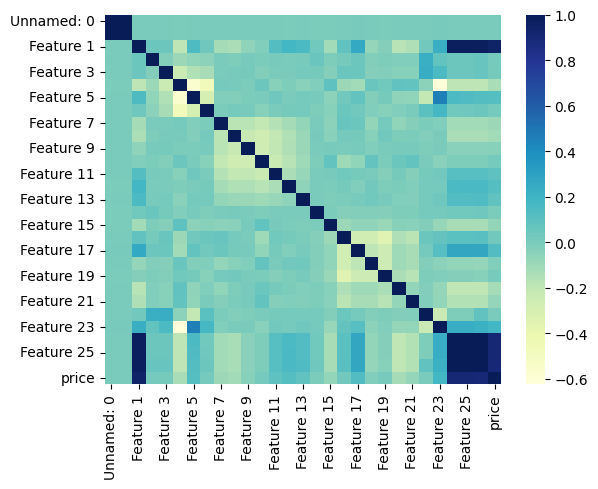

In [29]:
dataplot = sb.heatmap(train_data.corr(), cmap="YlGnBu")

In [47]:
for col in data.columns:
    unique_values = data[col].unique()
    if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
        print(f"{col} contains only 0 and 1")

Feature 2 contains only 0 and 1
Feature 3 contains only 0 and 1
Feature 4 contains only 0 and 1
Feature 5 contains only 0 and 1
Feature 6 contains only 0 and 1
Feature 7 contains only 0 and 1
Feature 8 contains only 0 and 1
Feature 9 contains only 0 and 1
Feature 10 contains only 0 and 1
Feature 11 contains only 0 and 1
Feature 12 contains only 0 and 1
Feature 13 contains only 0 and 1
Feature 14 contains only 0 and 1
Feature 15 contains only 0 and 1
Feature 16 contains only 0 and 1
Feature 17 contains only 0 and 1
Feature 18 contains only 0 and 1
Feature 19 contains only 0 and 1
Feature 20 contains only 0 and 1
Feature 21 contains only 0 and 1


In [49]:
target_variable = data["price"]

In [50]:
data_input = data.drop('price',axis=1)

In [51]:
data_input

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26
0,143728,143728,0.53,0,0,1,0,0,0,1,...,0,0,1,0,0,62.0,56.0,5.16,5.20,3.21
1,52657,52657,0.50,0,1,0,0,0,0,0,...,0,0,0,0,0,63.8,56.0,4.89,5.02,3.18
2,124407,124407,2.03,0,0,1,0,0,0,0,...,1,0,0,0,0,59.2,60.0,8.39,8.29,4.94
3,45535,45535,0.33,0,0,1,0,0,0,1,...,0,0,1,0,0,61.5,55.0,4.41,4.47,2.73
4,178894,178894,0.90,0,1,0,0,0,0,0,...,0,0,1,0,0,63.6,59.0,6.04,6.08,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135496,34345,34345,0.70,0,1,0,0,0,1,0,...,1,0,0,0,0,63.3,57.0,5.65,5.61,3.56
135497,9899,9899,0.33,0,0,1,0,0,0,0,...,0,0,0,0,0,62.6,57.0,4.43,4.40,2.77
135498,142454,142454,2.03,0,0,0,1,0,0,0,...,0,0,1,0,0,59.7,59.0,8.38,8.30,4.97
135499,129168,129168,0.73,0,1,0,0,0,0,1,...,0,0,1,0,0,63.2,59.0,5.67,5.72,3.61


In [52]:
X_train ,X_test,y_train,y_test = train_test_split(data_input,target_variable, test_size=0.2, random_state=42)

In [53]:

rf = RandomForestRegressor(n_estimators = 10, max_features = 'sqrt', max_depth = 5, random_state = 18)


In [54]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [55]:
y_pred = rf.predict(X_test)


In [56]:
data_output = pd.DataFrame(y_pred,y_test)
data_output

,0
price,
1412,1490.8
2027,1881.4
2397,2192.7
4969,4554.7
5887,5830.2
...,...
625,677.6
3927,3822.1
405,467.9


In [57]:
with_feature1 = {}

with_feature1['Mean Absolute Error:'] =  metrics.mean_absolute_error(y_test, y_pred)  
with_feature1['Mean Squared Error:'] =  metrics.mean_squared_error(y_test, y_pred) 
with_feature1['Root Mean Squared Error:'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [58]:
with_feature1

{'Mean Absolute Error:': 324.39246153278475,
 'Mean Squared Error:': 410113.5632297701,
 'Root Mean Squared Error:': 640.401095587578}

In [59]:
rf.score(X_test, y_test)

0.9746743086233429

In [129]:
#filename = 'mymodel.sav'
#pickle.dump(rf, open(filename, 'wb'))